In [64]:
from sklearn.datasets import load_iris

In [65]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [66]:
iris = load_iris()
X= iris['data']
y = iris['target']

In [67]:
n_samples, n_features = X.shape

In [68]:
n_samples, n_features

(150, 4)

Visualising the data

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#"Matplotlib inline" allows you to interact with your plots directly in the notebook or shell output, such as zooming, panning, and saving. Ease of use: Using "Matplotlib inline" is straightforward and requires only a single line of code to enable

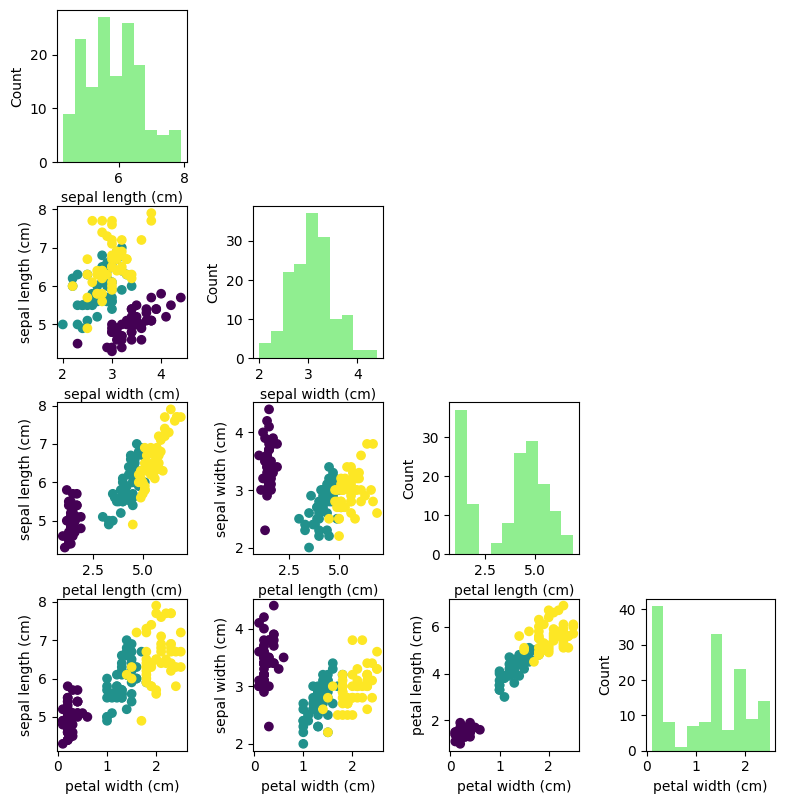

In [70]:
fig, ax  = plt.subplots(nrows = n_features, ncols = n_features, figsize = (8,8))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig.tight_layout()

names = iris.feature_names

for i in range(n_features):
    ax[i,i].hist(X[:,i],color = 'lightgreen') #comma !X[:,i]
    ax[i,i].set_ylabel('Count')
    ax[i,i].set_xlabel(names[i])
    
for i, j in zip(*np.triu_indices_from(ax,k=1)):
    ax[j,i].scatter(X[:,j],X[:,i], c=y)
    ax[j,i].set_xlabel(names[j])
    ax[j,i].set_ylabel(names[i])
    ax[i,j].set_axis_off()



In [71]:
np.triu_indices_from(ax, k=1)
#Use the k parameter to return the indices for the upper triangular array from the k-th diagonal.
#https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))



In python, an * unrolls a list.

That way you can use a list as a set of arguments.

some_args = ['first', False, 3]

do_something(*some_args)



PCA using covariance method

steps involved:
1.standardize data
2.find cov matrix
3.find eig vectors and vals for the matrix
4.rearrage eig vects and eig vals
5.choose principle components
6.project data


In [ ]:
mean_X  = np.mean(X,axis = 0)
std_X = np.std(X,axis=0)

def standardize_data(x):
    return (x-mean_X)/std_X
#element-wise

X_stdd = standardize_data(X)

In [ ]:
cov_matrix = np.cov(X_stdd.T)
#https://www.youtube.com/watch?v=152tSYtiQbw
#covariance matrix = 
# 
    # [var(A), cov(A,B),
    # cov(B,A), var(B)]
#cov(A,B) =E(AB)-E(A)E(B)
#cov matrix gives diagonal relationship between feature variables
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])


An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it. It can be expressed as

Av=λv

where v
is an eigenvector of A and λ is the corresponding eigenvalue. 

If we put all eigenvectors into the columns of a Matrix V and all eigenvalues as the entries of a diagonal matrix L we can write for our covariance matrix C

the following equation

CV=VL

where the covariance matrix can be represented as

C=VL(Vinv)

which can be also obtained by Singular Value Decomposition. 


#https://datascienceplus.com/understanding-the-covariance-matrix/ 
# RSSR


In [73]:
#The goal of principal component analysis is to identify the most meaningful basis to re-express a data set
#https://arxiv.org/pdf/1404.1100.pdf
#https://users.cs.utah.edu/~tch/CS4640/resources/A%20geometric%20interpretation%20of%20the%20covariance%20matrix.pdf

In [74]:
from numpy.linalg import eig

In [75]:
eig_val, eig_vect = eig(cov_matrix)
eig_val,eig_vect

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [76]:
np.abs(eig_vect)

array([[0.52106591, 0.37741762, 0.71956635, 0.26128628],
       [0.26934744, 0.92329566, 0.24438178, 0.12350962],
       [0.5804131 , 0.02449161, 0.14212637, 0.80144925],
       [0.56485654, 0.06694199, 0.63427274, 0.52359713]])

In [77]:
## Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive

max_abs_idx = np.argmax(np.abs(eig_vect),axis=0)
max_abs_idx

array([2, 1, 0, 2])

In [78]:
eig_vect[max_abs_idx, range(eig_vect.shape[0])]

array([ 0.5804131 , -0.92329566, -0.71956635, -0.80144925])

In [88]:
signs = np.sign(eig_vect[max_abs_idx, range(eig_vect.shape[0])])
eig_vect=eig_vect*signs[np.newaxis,:]
eig_vect = eig_vect.T

#https://www.edureka.co/community/66684/how-does-numpy-newaxis-work-and-when-to-use-it


eig_val, eig_vect

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
        [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
        [-0.26128628,  0.12350962,  0.80144925, -0.52359713]]))


numpy.sign()

Returns an element-wise indication of the sign of a number.

The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. nan is returned for nan inputs.



In [80]:
# sort eigenvalues in descending order.
eig_pair = [(np.abs(eig_val[i]),eig_vect[i,:]) for i in range(len(eig_val))]
eig_pair.sort(key=lambda x:x[0],reverse=True )
eig_val_sorted = np.array([x[0] for x in eig_pair])
eig_vect_sorted = np.array([x[1] for x in eig_pair])
eig_vect_sorted

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [81]:
k=2
W = eig_vect_sorted[2:,:]
#projection matrix

In [82]:
X_proj = X_stdd.dot(W.T)
X_proj.shape #on to 2 axes

(150, 2)

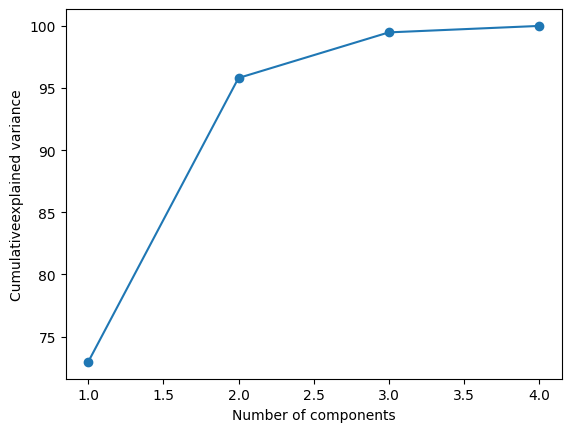

In [83]:
eig_val_total = sum(eig_val)
explained_variance = [(i/eig_val_total)*100 for i in eig_val_sorted]
explained_variance = np.round(explained_variance,2)
cum_explained_variance = np.cumsum(explained_variance)

plt.plot(np.arange(1,n_features+1),cum_explained_variance,'-o')
plt.xlabel("Number of components")
plt.ylabel('Cumulativeexplained variance')
plt.show()

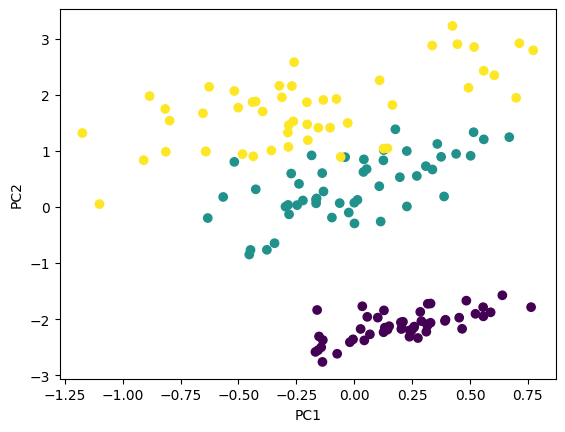

In [84]:
plt.scatter(X_proj[:,0],X_proj[:,1],c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

why is it desirable to maximize the explained variance?

The typical use of PCA is to keep only the first principal components. Because PCA is an orthogonal transformation, this corresponds to projecting the data from its original -dimensional space to a -dimensional subspace. The remaining components are lost in this projection; so it makes sense to minimize the variability of the data in those directions. Because the total variance is constant, minimizing the variance of the last variables is the same as maximizing the variance of the first

variables. The choices we make in PCA are motivated precisely by this objective:
PCA itself is designed to maximize the variance of the first  components, and minimize the variance of the last components, compared to all other orthogonal transformations. We choose the first components, and not just some
components, because they have the highest variance out of all principal components. We try to choose big enough to make the lost information — the variance of the last components — sufficiently small.
